In [1]:
pwd

'C:\\Users\\aakas\\jupyter_files'

In [7]:
### As i have changed some things in directory so thats the reason i have change pwd
import os
os.chdir(r'C://Users//aakas//data_files')

In [8]:
pwd

'C:\\Users\\aakas\\data_files'

In [9]:
import pandas as pd
from matplotlib import pyplot as plt

In [10]:
df = pd.read_csv('Iris.csv')

In [11]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [44]:
### I dont want to iris in species column
df.Species.str.split('-')[70][1]
# x[0].split(',')[-1]

'versicolor'

In [38]:
len(df)

150

In [57]:
nc = []
for i in range(len(df)):
    nc.append(df.Species.str.split('-')[i][1])

In [63]:
nc  = pd.DataFrame(nc)
nc

,0
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [61]:
## Now I will remove the old column
df.drop(columns='Species',axis=1,inplace=True)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [64]:
 ## Adding New Column
df[["Species"]] = nc
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [66]:
df_s1 = df[df["Species"] == "setosa"]
df_s2 = df[df["Species"] == "versicolor"]
df_s3 = df[df["Species"] == "virginica"]

Text(0.5, 1.0, 'IrisSpecies')

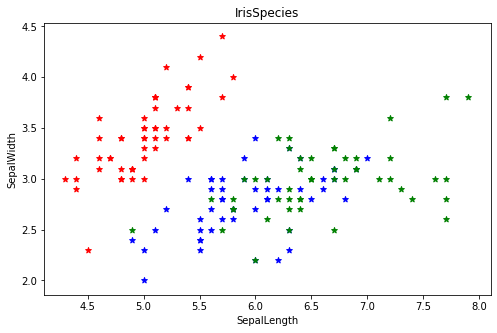

In [81]:
plt.figure(figsize=[8,5])
plt.scatter(df_s1["SepalLengthCm"],df_s1["SepalWidthCm"],color = "red",marker='*')
plt.scatter(df_s2["SepalLengthCm"],df_s2["SepalWidthCm"],color = "blue",marker='*')
plt.scatter(df_s3["SepalLengthCm"],df_s3["SepalWidthCm"],color = "green",marker='*')
plt.xlabel("SepalLength")
plt.ylabel("SepalWidth")
plt.title("IrisSpecies")

In [82]:
from sklearn.model_selection import train_test_split

In [83]:
x = df.drop(columns=["Species"],axis=1)
x

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,1,5.1,3.5,1.4,0.2
1,2,4.9,3.0,1.4,0.2
2,3,4.7,3.2,1.3,0.2
3,4,4.6,3.1,1.5,0.2
4,5,5.0,3.6,1.4,0.2
...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3
146,147,6.3,2.5,5.0,1.9
147,148,6.5,3.0,5.2,2.0
148,149,6.2,3.4,5.4,2.3


In [94]:
y = df["Species"].replace({"setosa": "0","versicolor":"1","virginica":2})
y = y.astype("int32")
y.dtypes

dtype('int32')

In [95]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int32

In [96]:
x_train,x_test,y_train,y_test  = train_test_split(x,y,test_size = 0.2)

In [97]:
len(x_train)

120

In [98]:
len(x_test)

30

In [123]:
from sklearn.svm import SVC
SVM = SVC(kernel='rbf')

In [124]:
SVM.fit(x_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [125]:
SVM.score(x_test,y_test)

1.0